# FISH PREDICTION

In [94]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

DATASET EXPLORATION AND PREPROCESSING

In [2]:
df = pd.read_csv("C://Fish.csv") 
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
df.shape

(159, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Species    159 non-null object
Weight     159 non-null float64
Length1    159 non-null float64
Length2    159 non-null float64
Length3    159 non-null float64
Height     159 non-null float64
Width      159 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
df.drop_duplicates()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [6]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

VISUALIZATION

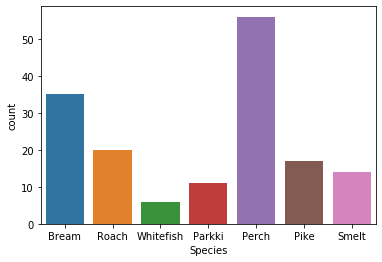

In [7]:
sns.countplot(x='Species', data=df)

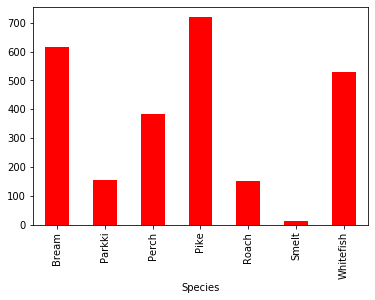

In [86]:
df.groupby('Species')['Weight'].mean().plot.bar(color='red')

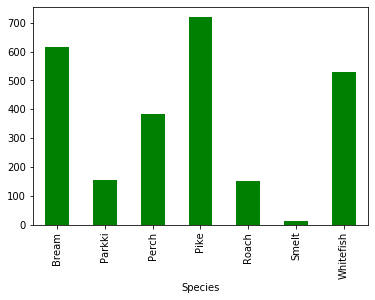

In [87]:
df.groupby('Species')['Weight'].mean().plot.bar(color='green')

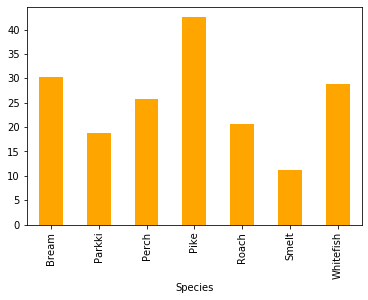

In [88]:
df.groupby('Species')['Length1'].mean().plot.bar(color='orange')

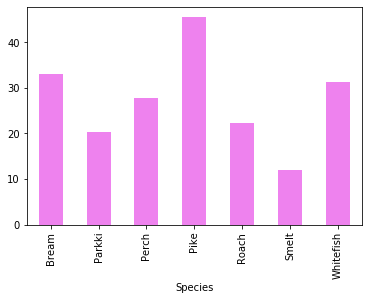

In [93]:
df.groupby('Species')['Length2'].mean().plot.bar(color='violet')

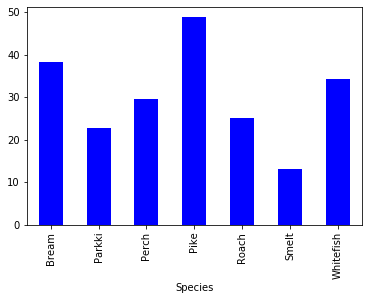

In [90]:
df.groupby('Species')['Length3'].mean().plot.bar(color='blue')

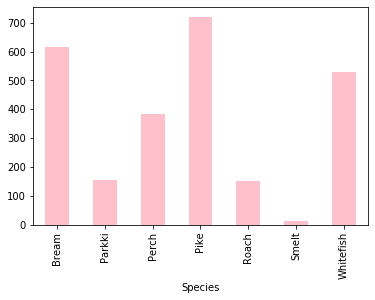

In [91]:
df.groupby('Species')['Weight'].mean().plot.bar(color='pink')

STANDARDIZATION

In [8]:
X=df[['Weight','Length1','Length2','Length3','Height','Width']].values
X[0:5]

array([[242.    ,  23.2   ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  24.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  23.9   ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  26.3   ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  26.5   ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [9]:
y=df['Species'].values
y[0:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [10]:
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(X)
X[0:5]

array([[-0.43807217, -0.30578858, -0.28230301, -0.10602023,  0.59657867,
        -0.23652895],
       [-0.30356218, -0.22550724, -0.19805366, -0.00233668,  0.82126055,
        -0.06657895],
       [-0.16344761, -0.23554241, -0.17933159, -0.01097698,  0.79734129,
         0.16579317],
       [-0.09899491,  0.0053016 ,  0.05469437,  0.19639012,  0.87977146,
         0.022621  ],
       [ 0.08875862,  0.02537193,  0.05469437,  0.23959159,  0.81283498,
         0.42637127]])

BUILDING A MODEL

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=4)

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200).fit(x_train,y_train)

In [82]:
yhat=rf.predict(x_test)
yhat

array(['Bream', 'Pike', 'Bream', 'Perch', 'Perch', 'Perch', 'Bream',
       'Bream', 'Perch', 'Roach', 'Smelt', 'Bream', 'Perch', 'Bream',
       'Bream', 'Parkki', 'Bream', 'Pike', 'Perch', 'Bream', 'Perch',
       'Bream', 'Bream', 'Perch', 'Smelt', 'Parkki', 'Bream', 'Perch',
       'Bream', 'Bream', 'Pike', 'Perch', 'Perch', 'Perch', 'Perch',
       'Pike', 'Bream', 'Bream', 'Perch', 'Whitefish', 'Perch', 'Bream',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Parkki', 'Smelt', 'Pike', 'Bream', 'Pike', 'Perch', 'Bream',
       'Pike', 'Bream', 'Bream', 'Parkki', 'Perch', 'Perch', 'Bream',
       'Bream'], dtype=object)

EVALUATION

In [83]:
from sklearn.metrics import accuracy_score,classification_report
acc=accuracy_score(y_test,yhat)
acc

0.859375

In [84]:
print(classification_report(y_test,yhat))


              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        23
      Parkki       1.00      0.80      0.89         5
       Perch       0.68      0.94      0.79        18
        Pike       1.00      1.00      1.00         7
       Roach       1.00      0.14      0.25         7
       Smelt       1.00      1.00      1.00         3
   Whitefish       0.00      0.00      0.00         1

    accuracy                           0.86        64
   macro avg       0.81      0.70      0.70        64
weighted avg       0.89      0.86      0.83        64

